In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

# 1. DATA

In [2]:
#Lets import the csv file in a Pandas DataFrame
df = pd.read_csv('Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 1.1 Data Overview

In [3]:
#Shape of the DataFrame
df.shape

(7043, 21)

In [4]:
#Column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
#Non-nulls & data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#Checking for nulls
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
#Checking for unique values of each columns
for item in df.columns:
    print('\n', item, ':', df[item].nunique(), '\n', df[item].unique())


 customerID : 7043 
 ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

 gender : 2 
 ['Female' 'Male']

 SeniorCitizen : 2 
 [0 1]

 Partner : 2 
 ['Yes' 'No']

 Dependents : 2 
 ['No' 'Yes']

 tenure : 73 
 [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

 PhoneService : 2 
 ['No' 'Yes']

 MultipleLines : 3 
 ['No phone service' 'No' 'Yes']

 InternetService : 3 
 ['DSL' 'Fiber optic' 'No']

 OnlineSecurity : 3 
 ['No' 'Yes' 'No internet service']

 OnlineBackup : 3 
 ['Yes' 'No' 'No internet service']

 DeviceProtection : 3 
 ['No' 'Yes' 'No internet service']

 TechSupport : 3 
 ['No' 'Yes' 'No internet service']

 StreamingTV : 3 
 ['No' 'Yes' 'No internet service']

 StreamingMovies : 3 
 ['No' 'Yes' 'No internet service']

 Contract : 3 
 ['Month-to-month' 'One year' 'Tw

# 2. DATA MANIPULATION

In [8]:
#The column 'TotalCharges' have some rows with spaces ' '.
df[df['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


- Tenure for all these 11 rows is 0. Churn is "No". One can interpret this as belonging to all new customers, if indeed these are the only rows with tenure = 0 too. This is verified to be true below. Hence we can set TotalCharges to 0, whenever tenure is 0.


In [9]:
df[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [10]:
#Replacing the ' ' with 0.
df['TotalCharges'].replace(to_replace = ' ', value = 0, inplace = True)

In [11]:
#Now lets convert the column 'TotalCharges' to a numeric column
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [12]:
#Checking the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
#Lets just remove the customerID column since it's of no use to us
df = df.iloc[:,1:]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#Lets just check how many churners and non-churners are present
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# 3. EXPLORATORY DATA ANALYSIS

# 3.1 Data Story

### Here we are going to ask and answer few questions about the data with respect to our dependent variable and also visualize & get insights from it.

### Note that,

**Target (Dependent) Variable:** Churn

**Feature (Independent) Variables:** 19 out of 20 shown above. Churn is our target.

We can divide predictor variables into:
   - **Person specific :** gender, SeniorCitizen,Partner, Dependents, tenure


   - **Service specific :**
      - Phone : PhoneService, MultipleLines      
      - Internet : InternetService, OnlineSecurity, OnlineBackup, StreamingTV, StreamingMovies, TechSupport, DeviceProtection


   - **Money specific :** MonthlyCharges, TotalCharges, Contract, PaperlessBilling, PaymentMethod


### The questions to which we seek answers:

   - Is there a **gender specific to churn**?
   
   
   - Is there any **person specific trends in churn**?
   
   
   - Is there a correlation between **tenure and churn**?
   
   
   - Is there a correlation between certain type of **services and churn**?
   
   
   - Is there a correlation between different types of **contract and churn**?
   
   
   - Is there a correlation between **paperless billing and churn**?
   
   
   - Is there a correlation between different types of **payment method and churn**?
   
   
   - Is there a correlation between **monthly charges and churn**?
   
   
   - Is there a correlation between **total charges and churn**?
   
   
   - Is there a correlation between **monthly charges and total charge with respect to churn**?
   
   
   - Is there a correlation between **monthly charges and tenure with respect to churn**?
   
   
   - Is there a correlation between **total charges and tenure with respect to churn**?

## 3.1.1 Customer Churn in the data

### First let us check out the number of customers who have churned or not churned.

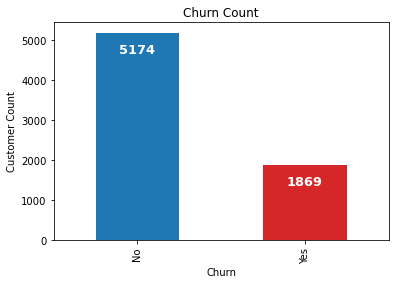

In [15]:
ax = df['Churn'].value_counts().plot(kind='bar', color=('tab:blue','tab:red'))
plt.xlabel('Churn')
plt.ylabel('Customer Count')
plt.title('Churn Count')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1)), (x + 0.14, y + height - 500), fontsize=13, color='white', weight='bold')

### Percent wise:

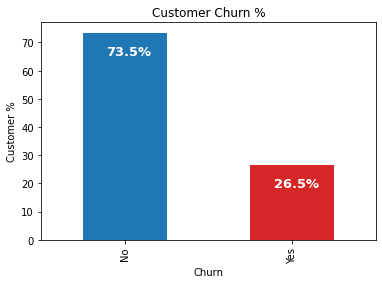

In [16]:
ax = (df['Churn'].value_counts()*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'))
plt.xlabel('Churn')
plt.ylabel('Customer %')
plt.title('Customer Churn %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.14, y + height - 8), fontsize=13, color='white', weight='bold')

#### So, we can see from above: 
   - Churn No - 73.5% or 5174 
   - Churn Yes - 26.5% or 1869

## 3.1.2 Gender distribution

### Let's see the the gender distribution in the dataset:

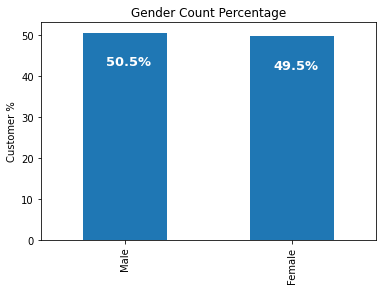

In [17]:
ax = (df['gender'].value_counts()*100/len(df)).plot(kind='bar')
plt.ylabel('Customer %')
plt.title('Gender Count Percentage')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.14, y + height - 8), fontsize=13, color='white', weight='bold')

- We can see that the gender distribution looks balanced.

## 3.1.3 Visualizing the customer's attributes with respect to Churn

### 3.1.3.1. Person specific attributes:

### ***Gender:***

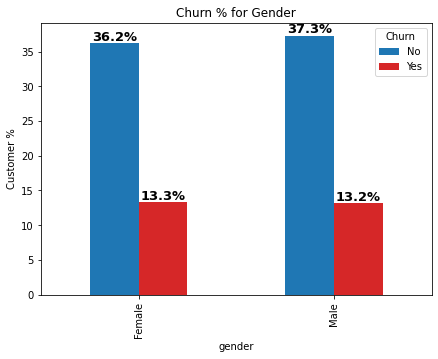

In [18]:
ax = (pd.crosstab(df.gender, df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Gender')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.01, y + height + 0.4), fontsize=13, weight='bold')

- The churn rate is not affected by the gender.

### ***Senior Citizen:***

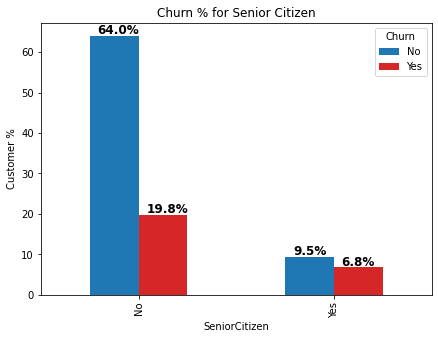

In [19]:
#Let us replace the values of the Senior Citizen column to Yes & No for now.
df['SeniorCitizen'].replace(to_replace = 0, value = 'No', inplace = True)
df['SeniorCitizen'].replace(to_replace = 1, value = 'Yes', inplace = True)

ax = (pd.crosstab(df.SeniorCitizen, df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Senior Citizen')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.04, y + height + 0.5), fontsize=12, weight='bold')

- Senior Citizens tend to churn less compared to non-senior citizens.

### ***Partner:***

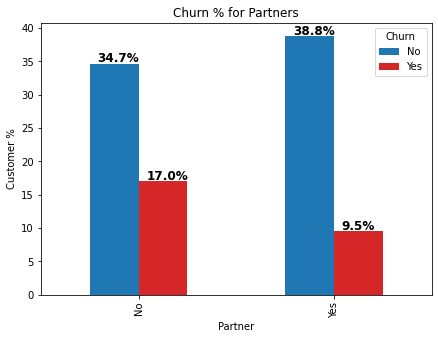

In [20]:
ax = (pd.crosstab(df.Partner,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Partners')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.04, y + height + 0.2), fontsize=12, weight='bold')

- Customers who don't have partners have higher churn rate.

### ***Dependents:***

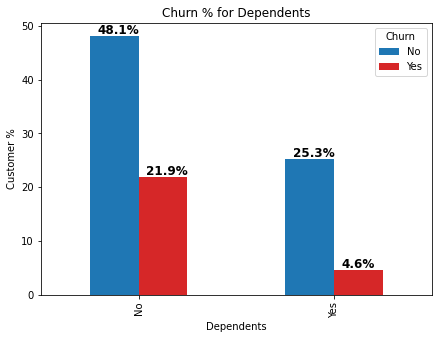

In [21]:
ax = (pd.crosstab(df.Dependents,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Dependents')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.04, y + height + 0.4), fontsize=12, weight='bold')

- Customers without dependents have higher churn rate.

### ***Tenure:***

Text(0, 0.5, 'Count')

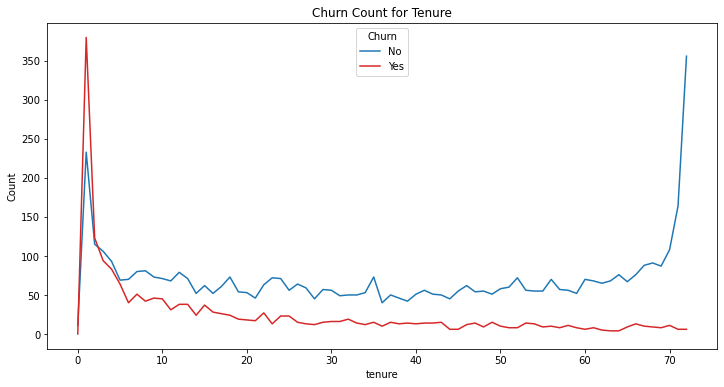

In [22]:
pd.crosstab(df.tenure,df.Churn).plot(color=('tab:blue','tab:red'), figsize=(12,6))
plt.title('Churn Count for Tenure')
plt.ylabel('Count')

- Churn count decreases as the tenure increases. 
- Customers tend to churn within the first few months or within a year.

### ***Tenure Group:***

#### Lets create 4 tenure groups to check the churn rate more clearly.

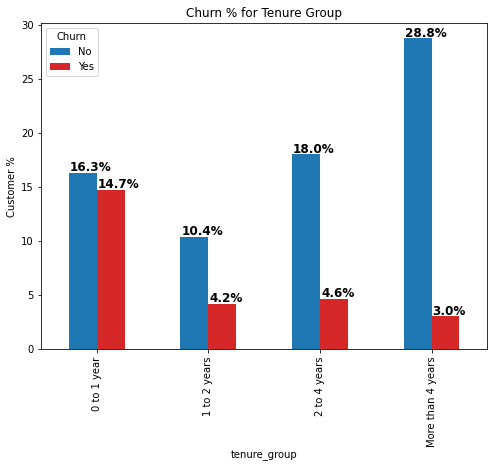

In [23]:
def tenure_grp(df) :  
    if df["tenure"] <= 12 :
        return "0 to 1 year"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "1 to 2 years"
    elif (df["tenure"] > 24) & (df["tenure"] <= 48):
        return "2 to 4 years"
    elif df["tenure"] > 48:
        return "More than 4 years"
df["tenure_group"] = df.apply(lambda df:tenure_grp(df), axis = 1)

#Now lets visualize it
ax = (pd.crosstab(df.tenure_group,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(8,6))
plt.title('Churn % for Tenure Group')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.01, y + height + 0.2), fontsize=12, weight='bold')

- Now we can clearly see that the churn rate is high in the 1st year.

### 3.1.3.2. Service specific attributes:

### Phone:

### ***Phone Service:***

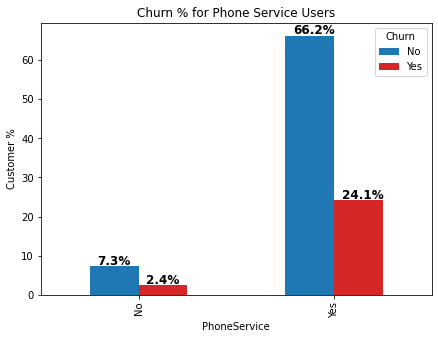

In [24]:
ax = (pd.crosstab(df.PhoneService,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Phone Service Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.04, y + height + 0.5), fontsize=12, weight='bold')

- Customers having phone service have higher churn rate.

### ***Multiple Lines:***

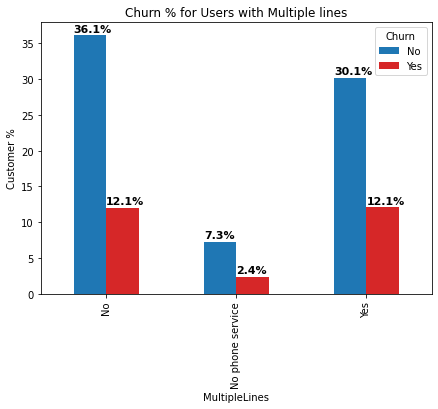

In [25]:
ax = (pd.crosstab(df.MultipleLines,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Users with Multiple lines')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.5), fontsize=11, weight='bold')

- Customers having multiple lines or not does not affect the churn rate.
- Customers without phone service tend to churn less.

### Internet:

### ***Internet Service:***

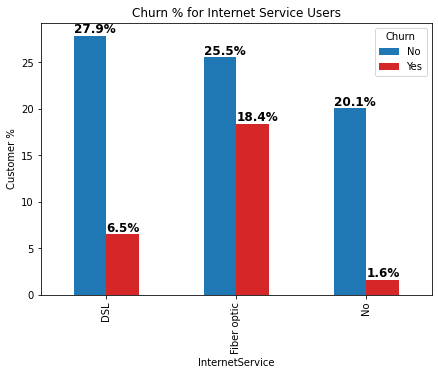

In [26]:
ax = (pd.crosstab(df.InternetService,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Internet Service Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=12, weight='bold')

- Customers with fiber optic connection have higher churn rate.

### ***Online Security, Online Backup, Device Protection & Tech Support:***

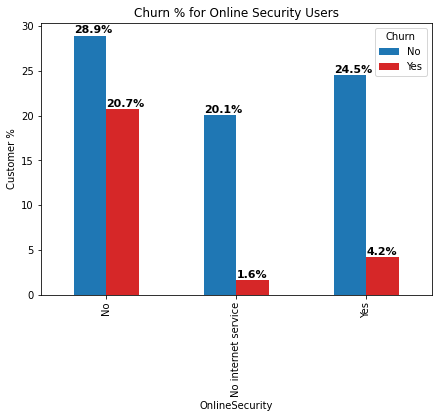

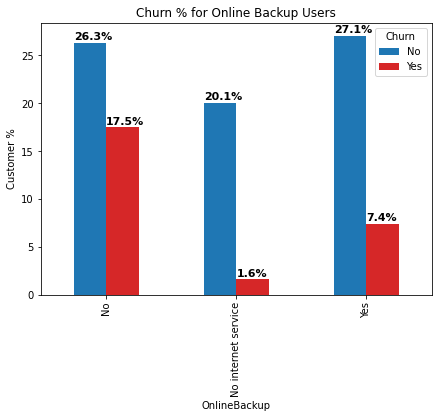

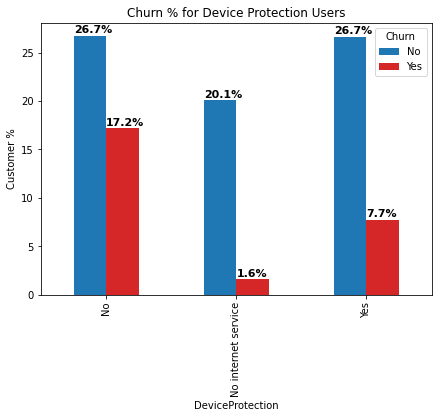

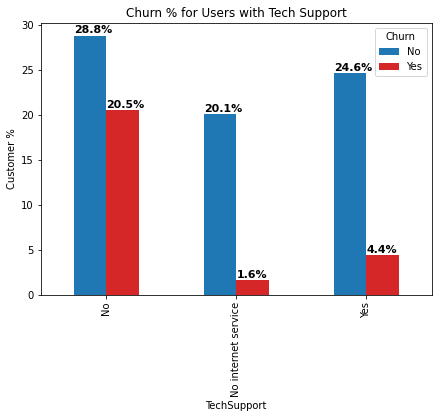

In [27]:
#Online Security
ax = (pd.crosstab(df.OnlineSecurity,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Online Security Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')
    
#Online Backup
ax = (pd.crosstab(df.OnlineBackup,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Online Backup Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')

#Device Protection
ax = (pd.crosstab(df.DeviceProtection,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Device Protection Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')

#Tech Support
ax = (pd.crosstab(df.TechSupport,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Users with Tech Support')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')

- Customers who do not have Online Security, Online Backup, Device Protection & Tech Support have higher churn rate.

### ***Streaming TV & Streaming Movies:***

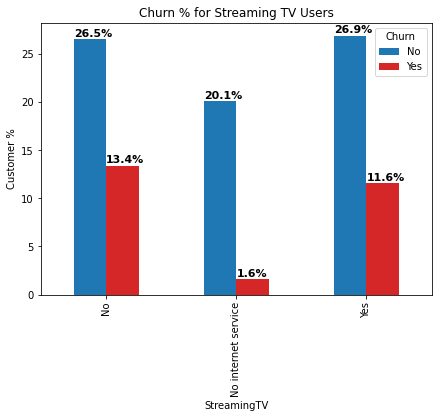

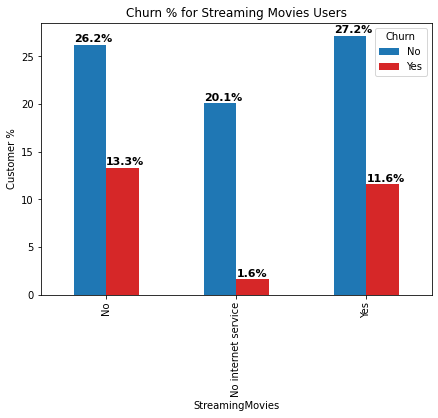

In [28]:
#Streaming TV
ax = (pd.crosstab(df.StreamingTV,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Streaming TV Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')
    
#Streaming Movies
ax = (pd.crosstab(df.StreamingMovies,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Streaming Movies Users')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=11, weight='bold')

- The churn rate do not have a big difference between the customers having the service of Streaming TV & Streaming Movies or not.

### 3.1.3.3 Money specific attributes:

### ***Contract:***

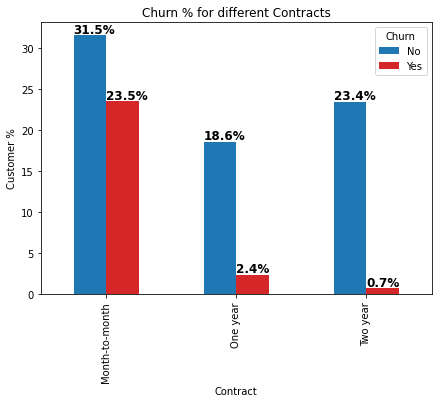

In [29]:
ax = (pd.crosstab(df.Contract,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for different Contracts')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=12, weight='bold')

- Customers having Month-to-Month contracts have a high churn rate.

### ***Paperless Billing:***

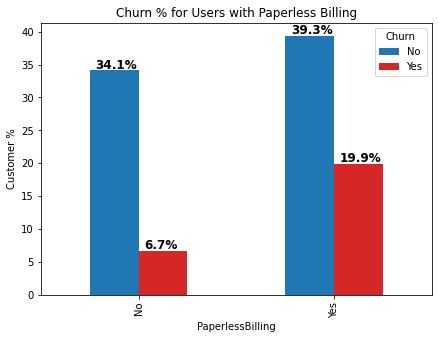

In [30]:
ax = (pd.crosstab(df.PaperlessBilling,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(7,5))
plt.title('Churn % for Users with Paperless Billing')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.03, y + height + 0.3), fontsize=12, weight='bold')

- Customers with paperless billing tend to churn out more.

### ***Payment Method:***

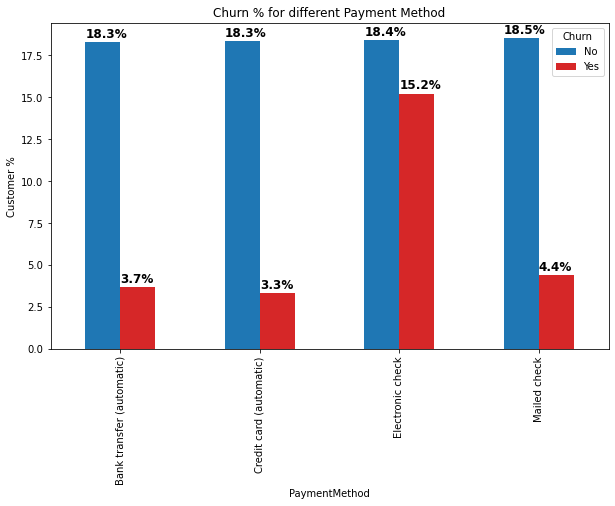

In [31]:
ax = (pd.crosstab(df.PaymentMethod,df.Churn)*100/len(df)).plot(kind='bar', color=('tab:blue','tab:red'), figsize=(10,6))
plt.title('Churn % for different Payment Method')
plt.ylabel('Customer %')
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(str(round(height, 1))+'%', (x + 0.001, y + height + 0.3), fontsize=12, weight='bold')

- Customers who pay electronic check have a high churn rate.

### ***Monthly Charges:***

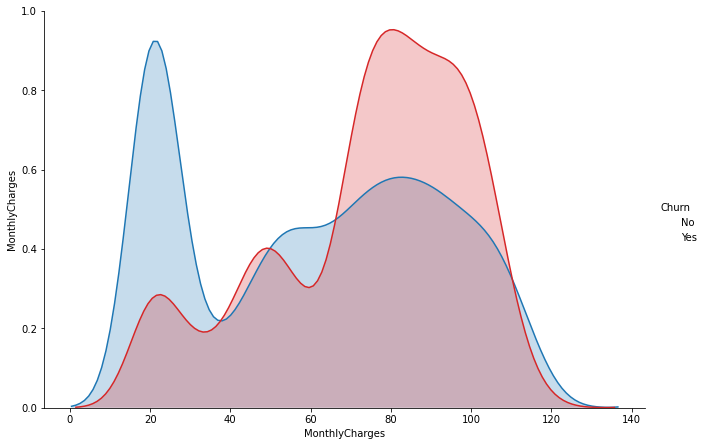

In [32]:
sns.pairplot(df, vars=['MonthlyCharges'], hue='Churn', palette=['tab:blue','tab:red'], height=6, aspect=1.5)

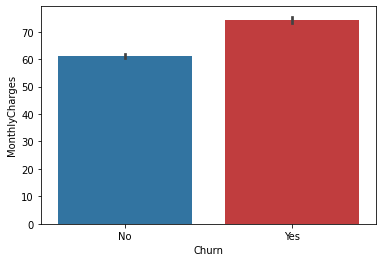

In [33]:
sns.barplot('Churn', 'MonthlyCharges', data=df, palette=['tab:blue','tab:red'])

- Churn rate increases as Monthly Charges increases.

### ***Total Charges:***

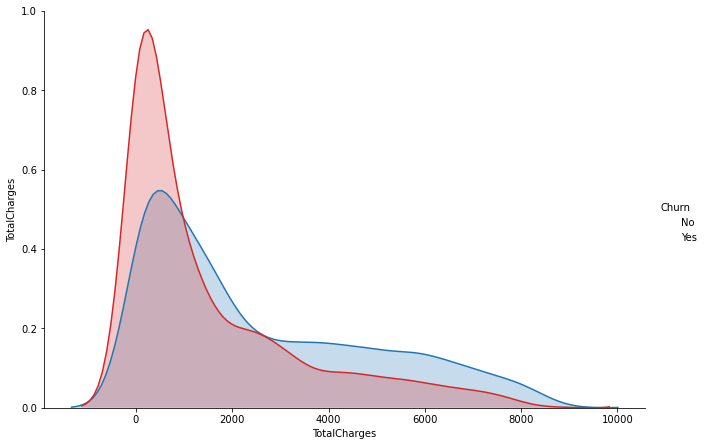

In [34]:
sns.pairplot(df, vars=['TotalCharges'], hue='Churn', palette=['tab:blue','tab:red'], height=6, aspect=1.5)

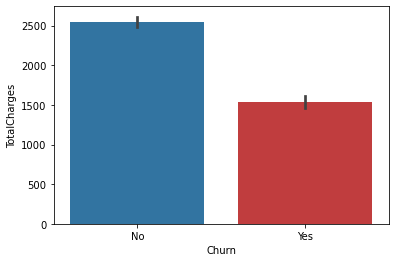

In [35]:
sns.barplot('Churn', 'TotalCharges', data=df, palette=['tab:blue','tab:red'])

- Churn rate decreases as Total Charges increases.

## 3.1.4 Relationship between the numeric columns with respect to Churn

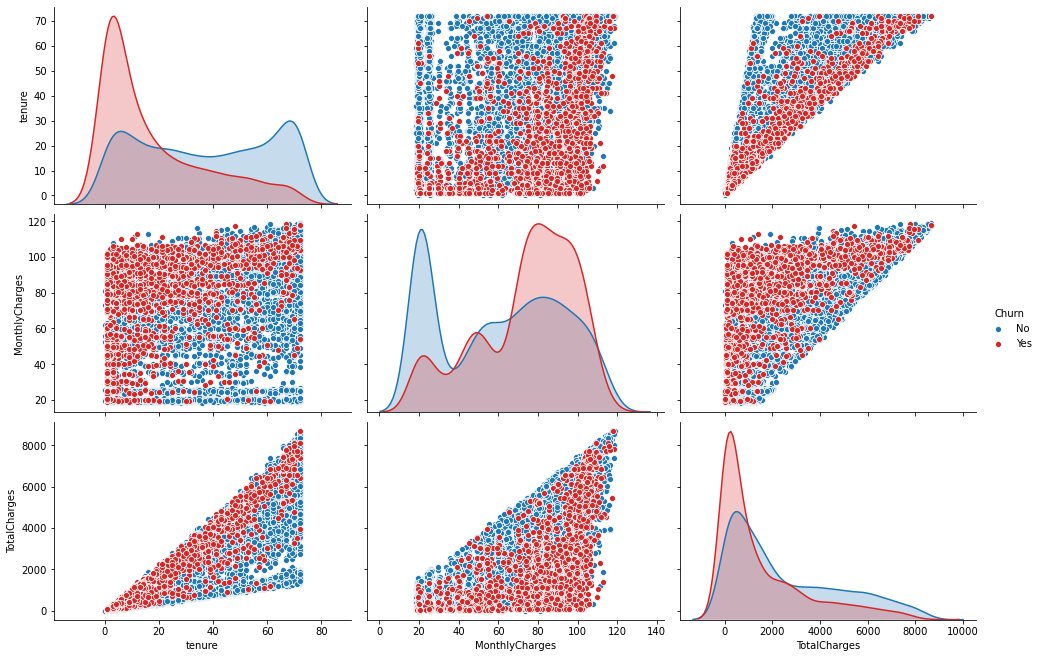

In [36]:
sns.pairplot(df, hue='Churn', palette=['tab:blue','tab:red'], height=3, aspect=1.5)

### 3.1.4.1 Monthly Charges and Total Charges by Churn

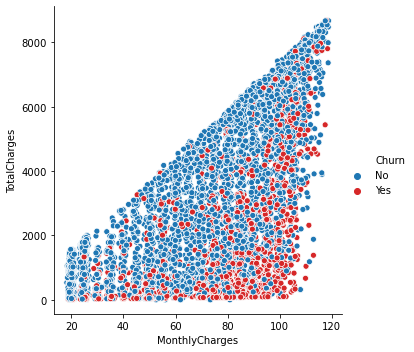

In [37]:
sns.relplot(x="MonthlyCharges", y='TotalCharges', hue='Churn', data=df, palette=['tab:blue','tab:red'])

- Total Charge increases as the Monthly Charge increases.
- Churn is mainly towards the bottom which indicates that churn increases with increase in monthly charge.

### 3.1.4.2 Monthly Charges and Tenure by Churn

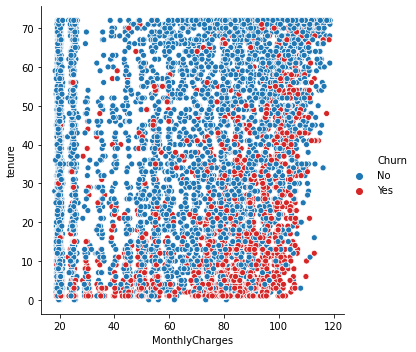

In [38]:
sns.relplot(x='MonthlyCharges', y='tenure', hue='Churn', data=df, palette=['tab:blue','tab:red'])

- Monthly charges may or may not increase with tenure.
- Again we can see that churn increases with increase in monthly charge.

### 3.1.4.3 Total Charges and Tenure by Churn

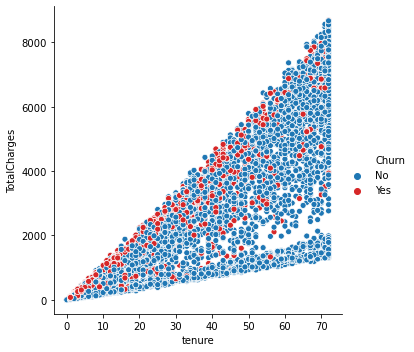

In [39]:
sns.relplot( x='tenure', y='TotalCharges', hue='Churn', data=df, palette=['tab:blue','tab:red'])

- Total charges increases with tenure.
- Churn rate does not increase so much with increase of either total charge or tenure.

### 3.1.4.4 Monthly Charges, Total Charges and Churn by Tenure groups

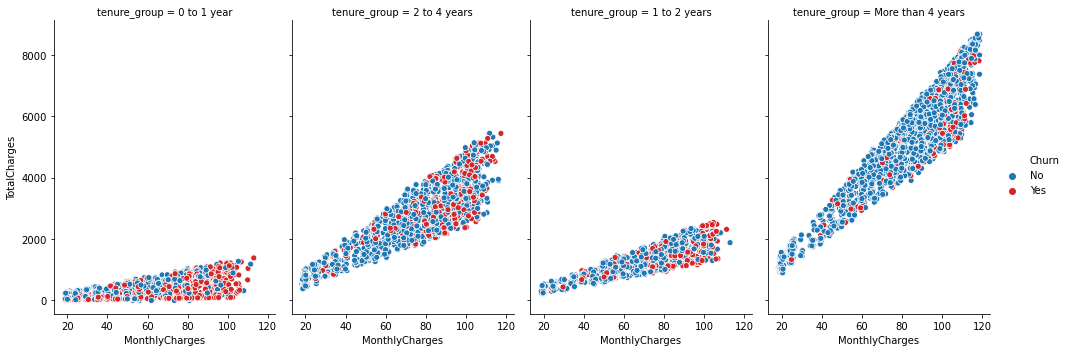

In [40]:
sns.relplot(x="MonthlyCharges", y='TotalCharges', hue='Churn', col='tenure_group', data=df, palette=['tab:blue','tab:red'], height=5, aspect=0.7)

- This clearly indicates that the churn rate is high within the 1st year and also it increases with monthly charge.

## 3.1.5 Correlation between the numeric columns

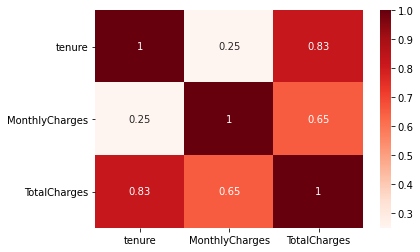

In [41]:
sns.heatmap(df.corr(), annot=True, cmap='Reds')

- Tenure and Total Charges are highly correlated.
- Monthly Charges and Total Charges are highly correlated.

## 3.2 Inferential Statistics

### Here we will be applying statistical tools to gain some inferences and insights into the data and discover relationships between various features of our dataset with the target variable by hypothesis testing.

### We will use Chi-square test of independence of variables in a contingency table.

## 3.2.1 Gender influence on Churn

Let us check if gender has any influence on churn or not.

- **Null Hypothesis:** Gender has no influence on churn.
- **Alternate Hypothesis:** Gender has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [42]:
obs = pd.crosstab(df.gender, df.Churn)
obs

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [43]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 0.4840828822091383
p-value: 0.48657873605618596


- **The p-value obtained is more than our chosen significance level. Therefore, we accept the null hypothesis.**
- **Gender has no influence on churn.**

## 3.2.2 Senior Citizen influence on Churn

Let us check if being a senior citizen has any influence on churn or not.

- **Null Hypothesis:** Senior citizen has no influence on churn.
- **Alternate Hypothesis:** Senior citizen has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [44]:
obs = pd.crosstab(df.SeniorCitizen, df.Churn)
obs

Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


In [45]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 159.42630036838742
p-value: 1.510066805092378e-36


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Senior citizen has influence on churn.**

## 3.2.3 Partner influence on Churn

Let us check if having a partner has any influence on churn or not.

- **Null Hypothesis:** Partner has no influence on churn.
- **Alternate Hypothesis:** Partner has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [46]:
obs = pd.crosstab(df.Partner, df.Churn)
obs

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [47]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 158.7333820309922
p-value: 2.1399113440759935e-36


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Partner has influence on churn.**

## 3.2.4 Dependent influence on Churn

Let us check if having a dependent has any influence on churn or not.

- **Null Hypothesis:** Dependents has no influence on churn.
- **Alternate Hypothesis:** Dependents has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [48]:
obs = pd.crosstab(df.Dependents, df.Churn)
obs

Churn,No,Yes
Dependents,,
No,3390,1543
Yes,1784,326


In [49]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 189.12924940423474
p-value: 4.9249216612154196e-43


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Dependents has influence on churn.**

## 3.2.5 Tenure influence on Churn

Let us check if tenure has any influence on churn or not.

- **Null Hypothesis:** Tenure has no influence on churn.
- **Alternate Hypothesis:** Tenure has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [50]:
obs = pd.crosstab(df.Churn, df.tenure)
obs

tenure,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
Churn,,,,,,,,,,,,,,,,,,,,,
No,11,233,115,106,93,69,70,80,81,73,...,68,76,67,76,88,91,87,108,164,356
Yes,0,380,123,94,83,64,40,51,42,46,...,4,4,9,13,10,9,8,11,6,6


In [51]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 1065.3308567510544
p-value: 1.2807811055496877e-176


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Tenure has influence on churn.**

## 3.2.6 Phone Service influence on Churn

Let us check if having phone service has any influence on churn or not.

- **Null Hypothesis:** Phone service has no influence on churn.
- **Alternate Hypothesis:** Phone service has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [52]:
obs = pd.crosstab(df.PhoneService, df.Churn)
obs

Churn,No,Yes
PhoneService,,
No,512,170
Yes,4662,1699


In [53]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 0.9150329892546948
p-value: 0.3387825358066928


- **The p-value obtained is more than our chosen significance level. Therefore, we accept the null hypothesis.**
- **Phone service has no influence on churn.**

## 3.2.7 Multiple lines influence on Churn

Let us check if having multiple phone lines has any influence on churn or not.

- **Null Hypothesis:** Multiple lines has no influence on churn.
- **Alternate Hypothesis:** Multiple lines has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [54]:
obs = pd.crosstab(df.MultipleLines, df.Churn)
obs

Churn,No,Yes
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850


In [55]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 11.33044148319756
p-value: 0.0034643829548773


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Multiple lines has influence on churn.**

## 3.2.8 Internet Service influence on Churn

Let us check if having internet service has any influence on churn or not.

- **Null Hypothesis:** Internet service has no influence on churn.
- **Alternate Hypothesis:** Internet service has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [56]:
obs = pd.crosstab(df.InternetService, df.Churn)
obs

Churn,No,Yes
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113


In [57]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 732.309589667794
p-value: 9.571788222840544e-160


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Internet service has influence on churn.**

## 3.2.9 Online Security influence on Churn

Let us check if having online security has any influence on churn or not.

- **Null Hypothesis:** Online security has no influence on churn.
- **Alternate Hypothesis:** Online security has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [58]:
obs = pd.crosstab(df.OnlineSecurity, df.Churn)
obs

Churn,No,Yes
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295


In [59]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 849.9989679615965
p-value: 2.661149635176552e-185


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Online security has influence on churn.**

## 3.2.10 Online Backup influence on Churn

Let us check if having online backup has any influence on churn or not.

- **Null Hypothesis:** Online backup has no influence on churn.
- **Alternate Hypothesis:** Online backup has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [60]:
obs = pd.crosstab(df.OnlineBackup, df.Churn)
obs

Churn,No,Yes
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523


In [61]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 601.812790113409
p-value: 2.0797592160864276e-131


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Online backup has influence on churn.**

## 3.2.11 Device Protection influence on Churn

Let us check if having device protection has any influence on churn or not.

- **Null Hypothesis:** Device protection has no influence on churn.
- **Alternate Hypothesis:** Device protection has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [62]:
obs = pd.crosstab(df.DeviceProtection, df.Churn)
obs

Churn,No,Yes
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545


In [63]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 558.419369407389
p-value: 5.505219496457244e-122


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Device protection has influence on churn.**

## 3.2.12 Tech Support influence on Churn

Let us check if having tech support has any influence on churn or not.

- **Null Hypothesis:** Tech support has no influence on churn.
- **Alternate Hypothesis:** Tech support has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [64]:
obs = pd.crosstab(df.TechSupport, df.Churn)
obs

Churn,No,Yes
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310


In [65]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 828.1970684587394
p-value: 1.4430840279998987e-180


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Tech support has influence on churn.**

## 3.2.13 Streaming TV influence on Churn

Let us check if having streaming TV service has any influence on churn or not.

- **Null Hypothesis:** Streaming TV has no influence on churn.
- **Alternate Hypothesis:** Streaming TV has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [66]:
obs = pd.crosstab(df.StreamingTV, df.Churn)
obs

Churn,No,Yes
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814


In [67]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 374.2039433109813
p-value: 5.528994485739183e-82


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Streaming TV has influence on churn.**

## 3.2.14 Streaming Movies influence on Churn

Let us check if having streaming movies service has any influence on churn or not.

- **Null Hypothesis:** Streaming movies has no influence on churn.
- **Alternate Hypothesis:** Streaming movies has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [68]:
obs = pd.crosstab(df.StreamingMovies, df.Churn)
obs

Churn,No,Yes
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818


In [69]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 375.6614793452656
p-value: 2.667756755723681e-82


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Streaming movies has influence on churn.**

## 3.2.15 Contract influence on Churn

Let us check if a type of contract has any influence on churn or not.

- **Null Hypothesis:** Contract has no influence on churn.
- **Alternate Hypothesis:** Contract has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [70]:
obs = pd.crosstab(df.Contract, df.Churn)
obs

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [71]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 1184.5965720837926
p-value: 5.863038300673391e-258


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Contract has influence on churn.**

## 3.2.16 Paperless Billing influence on Churn

Let us check if paperless billing has any influence on churn or not.

- **Null Hypothesis:** Paperless billing has no influence on churn.
- **Alternate Hypothesis:** Paperless billing has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [72]:
obs = pd.crosstab(df.PaperlessBilling, df.Churn)
obs

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [73]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 258.27764906707307
p-value: 4.073354668665985e-58


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Paperless billing has influence on churn.**

## 3.2.17 Payment Method influence on Churn

Let us check if payment method has any influence on churn or not.

- **Null Hypothesis:** Payment method has no influence on churn.
- **Alternate Hypothesis:** Payment method has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [74]:
obs = pd.crosstab(df.PaymentMethod, df.Churn)
obs

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),1286,258
Credit card (automatic),1290,232
Electronic check,1294,1071
Mailed check,1304,308


In [75]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 648.1423274814
p-value: 3.6823546520097993e-140


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Payment method has influence on churn.**

## 3.2.18 Monthly Charge influence on Churn

Let us check if monthly charge has any influence on churn or not.

- **Null Hypothesis:** Monthly charge has no influence on churn.
- **Alternate Hypothesis:** Monthly charge has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [76]:
obs = pd.crosstab(df.Churn, df.MonthlyCharges)
obs

MonthlyCharges,18.25,18.40,18.55,18.70,18.75,18.80,18.85,18.90,18.95,19.00,...,117.35,117.45,117.50,117.60,117.80,118.20,118.35,118.60,118.65,118.75
Churn,,,,,,,,,,,,,,,,,,,,,
No,1,1,1,2,1,7,4,2,5,6,...,1,0,1,1,0,1,0,2,1,1
Yes,0,0,0,0,0,0,1,0,1,1,...,0,1,0,0,1,0,1,0,0,0


In [77]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 2123.609129997958
p-value: 1.8852727784254426e-18


- **The p-value obtained is less than our chosen significance level. Therefore, we reject the null hypothesis.**
- **Monthly charge has influence on churn.**

## 3.2.19 Total Charge influence on Churn

Let us check if total charge has any influence on churn or not.

- **Null Hypothesis:** Total charge has no influence on churn.
- **Alternate Hypothesis:** Total charge has influence on churn.

We will assume our significance level, $\alpha$ = 0.05.

In [78]:
obs = pd.crosstab(df.Churn, df.TotalCharges)
obs

TotalCharges,0.00,18.80,18.85,18.90,19.00,19.05,19.10,19.15,19.20,19.25,...,8477.70,8496.70,8529.50,8543.25,8547.15,8564.75,8594.40,8670.10,8672.45,8684.80
Churn,,,,,,,,,,,,,,,,,,,,,
No,11,1,1,1,1,1,2,1,4,2,...,1,1,1,1,1,1,1,1,1,0
Yes,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [79]:
chi2, p, dof, expected = stats.chi2_contingency(obs)
print('Chi-squared test statistic:', chi2)
print('p-value:', p)

Chi-squared test statistic: 6514.047812769442
p-value: 0.5532461954861401


- **The p-value obtained is more than our chosen significance level. Therefore, we accept the null hypothesis.**
- **Total charge has no influence on churn.**

**Result:**

- ***Gender, Phone Service & Total Charge* have no influence on churn according to the chi-square test of independence of variables.** 

- **16 out of the 19 variables have influence on churn.**

# 4. DATA PRE-PROCESSING

## 4.1 Label Encoding and Scaling

In [80]:
# Label Encoding categorical columns
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df2 = df.apply(lambda x: object_to_int(x))

# Scaling numercial columns
std = StandardScaler()
scaled = pd.DataFrame(std.fit_transform(df2[['tenure', 'MonthlyCharges', 'TotalCharges']]), 
                      columns=['tenure', 'MonthlyCharges', 'TotalCharges'])

df2 = df2.drop(columns=['tenure', 'MonthlyCharges', 'TotalCharges'], axis=1)
df2 = df2.merge(scaled, left_index=True, right_index=True, how="left")
df2.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,tenure_group,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,2,0,...,0,0,0,1,2,0,0,-1.277445,-1.160323,-0.992611
1,1,0,0,0,1,0,0,2,0,2,...,0,0,1,0,3,0,2,0.066327,-0.259629,-0.172165
2,1,0,0,0,1,0,0,2,2,0,...,0,0,0,1,3,1,0,-1.236724,-0.362660,-0.958066
3,1,0,0,0,0,1,0,2,0,2,...,0,0,1,0,0,0,2,0.514251,-0.746535,-0.193672
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,2,1,0,-1.236724,0.197365,-0.938874


## 4.2 Variable Summary

In [81]:
np.round(df2.describe().T, 3)

,count,mean,std,min,25%,50%,75%,max
gender,7043.0,0.505,0.500,0.000,0.000,1.000,1.000,1.000
SeniorCitizen,7043.0,0.162,0.369,0.000,0.000,0.000,0.000,1.000
Partner,7043.0,0.483,0.500,0.000,0.000,0.000,1.000,1.000
Dependents,7043.0,0.300,0.458,0.000,0.000,0.000,1.000,1.000
PhoneService,7043.0,0.903,0.296,0.000,1.000,1.000,1.000,1.000
MultipleLines,7043.0,0.941,0.949,0.000,0.000,1.000,2.000,2.000
InternetService,7043.0,0.873,0.738,0.000,0.000,1.000,1.000,2.000
OnlineSecurity,7043.0,0.790,0.860,0.000,0.000,1.000,2.000,2.000
OnlineBackup,7043.0,0.906,0.880,0.000,0.000,1.000,2.000,2.000
DeviceProtection,7043.0,0.904,0.880,0.000,0.000,1.000,2.000,2.000


## 4.3 Correlation Matrix

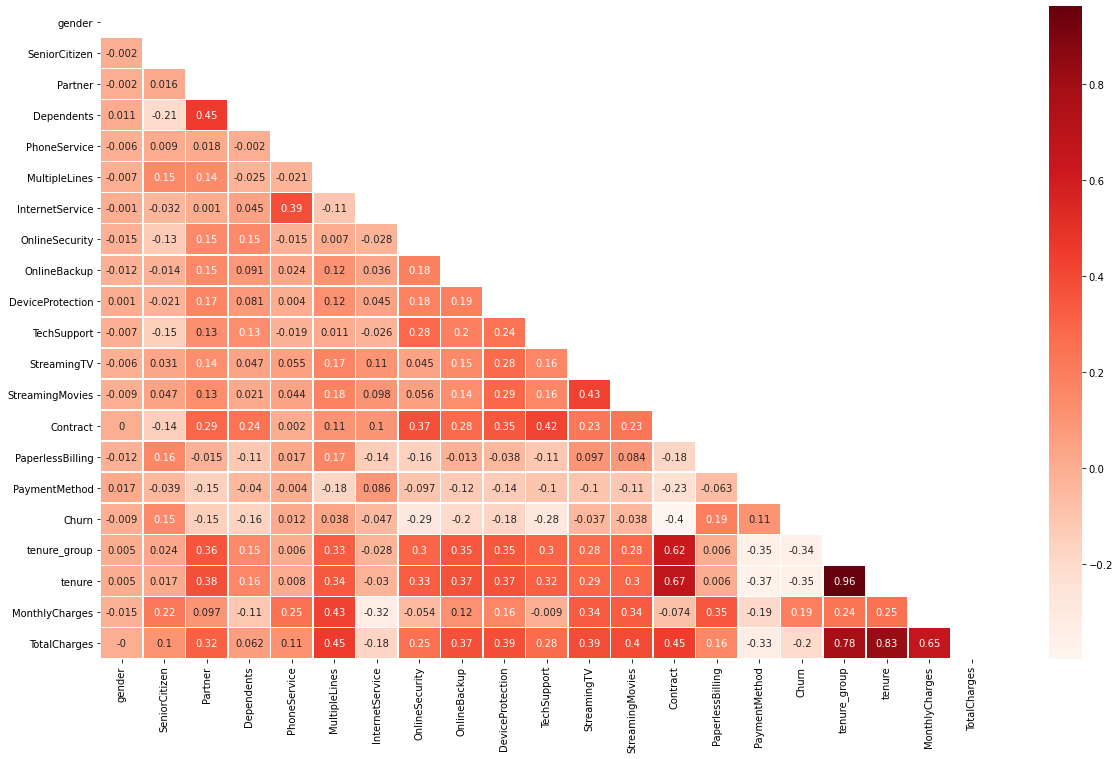

In [82]:
plt.figure(figsize = (20,12))
matrix = np.triu(df2.corr())
sns.heatmap(np.round(df2.corr(),3), annot=True, mask=matrix, cmap='Reds', linewidths=0.6)

## 4.4 Visualizing data with Principal Components

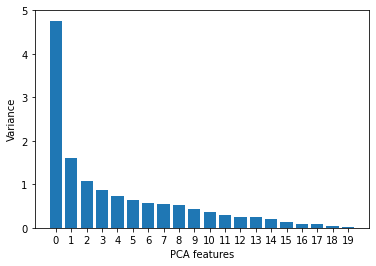

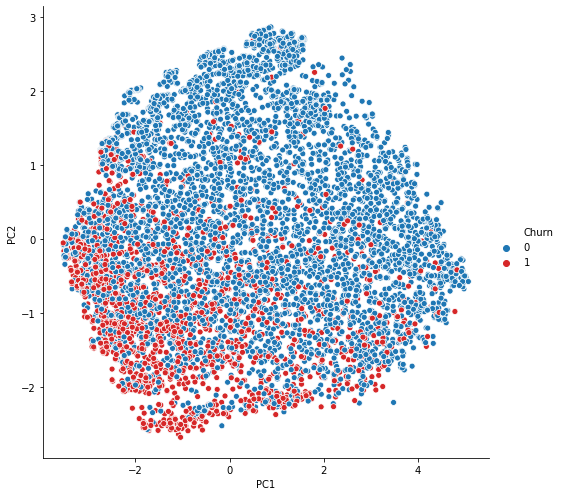

In [83]:
X = df2.drop('Churn', axis=1)
y = df2['Churn']

pc = PCA().fit(X)
features = range(pc.n_components_)

plt.bar(features, pc.explained_variance_)
plt.xticks(features)
plt.xlabel('PCA features')
plt.ylabel('Variance')
plt.show()

pca = pd.DataFrame(PCA(n_components=2).fit_transform(X))
pca.columns = ['PC1', 'PC2']
pca = pca.merge(y, left_index=True, right_index=True, how="left")

sns.relplot('PC1', 'PC2', hue='Churn', data=pca, palette=['tab:blue','tab:red'], height=7)

# 5. MODEL BUILDING

### *Let us first define some functions to tune the parameters and see the performance of the model.*

In [84]:
#Function attributes
#clf - Classifier used
#param_grid = Dictionary with parameters names as keys and lists of parameter settings to try as values

def grid_search_cv(clf, param_grid):
    clf_cv = GridSearchCV(clf, param_grid, cv=10)
    clf_cv.fit(X_train, y_train)
    y_pred = clf_cv.predict(X_test)
    print('Best parameter:', clf_cv.best_params_)
    print('Best score:', clf_cv.best_score_)
    
def randomized_search_cv(clf, param_grid):
    clf_cv = RandomizedSearchCV(clf, param_grid, cv=10)
    clf_cv.fit(X_train, y_train)
    y_pred = clf_cv.predict(X_test)
    print('Best parameter:', clf_cv.best_params_)
    print('Best score:', clf_cv.best_score_)
    
    
#Function attributes
#clf - Classifier used
    
def model_performance(clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    print('Accuracy score:', accuracy_score(y_test, y_pred))
    print('\n------------------------------------------------------')
    
    sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, square=True,
                xticklabels=('Not Churn', 'Churn'), yticklabels=('Not Churn', 'Churn'), linewidths=0.3, linecolor='black')
    plt.xlabel('Predicted label', fontsize=12)
    plt.ylabel('True label', fontsize=12)
    plt.title('Confusion Matrix', fontsize=15)
    plt.show()
    print('\nClassification Rpeort:\n', classification_report(y_test, y_pred))
    print('------------------------------------------------------')
    
    y_pred_prob = clf.predict_proba(X_test)[:,1]
    fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)
    print('\nArea under curve:', roc_auc_score(y_test, y_pred_prob))

    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.title('ROC Curve', fontsize=15)
    plt.show()
    
#Function attributes
#clf - Classifier used
#cf - ["coefficients","features"](cooefficients for logistic regression, features for tree based models)

def coef(clf, cf):
    clf.fit(X_train, y_train).predict(X_test)
    
    if cf == 'coefficients':
        coefficients  = pd.DataFrame(clf.coef_.ravel())
    elif cf == 'features':
        coefficients  = pd.DataFrame(clf.feature_importances_)
        
    column_df = pd.DataFrame(X.columns)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True, right_index= True, how = "left"))
    coef_sumry.columns = ['coefficients','features']
    coef_sumry = coef_sumry.sort_values(by = 'coefficients',ascending = False)
    
    plt.figure(figsize=(10,6))
    plt.bar(coef_sumry['features'], coef_sumry['coefficients'], 
            color=(coef_sumry['coefficients'] > 0).map({True: 'tab:red', False: 'tab:blue'}))
    plt.title('Feature Importance', fontsize=20)
    plt.ylabel('Coefficient value', fontsize=15)
    plt.xlabel('Features', fontsize=15)
    plt.xticks(rotation=90)
    plt.show()

## 5.1 Baseline Model

### *Here we will see the performance of the models with default parameters.*

In [85]:
# Splitting train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)

classifiers = [['LogisticRegression :', LogisticRegression()],
               ['KNeighbours :', KNeighborsClassifier()],
               ['SVM :', SVC()],
               ['DecisionTree :',DecisionTreeClassifier()],
               ['RandomForest :',RandomForestClassifier()], 
               ['Naive Bayes :', GaussianNB()]]

for name, classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    print(name, accuracy_score(y_test, predictions))

LogisticRegression : 0.7913413768630234
KNeighbours : 0.7565649396735273
SVM : 0.7927608232789212
DecisionTree : 0.71611071682044
RandomForest : 0.7721788502484032
Naive Bayes : 0.7295954577714692


## 5.2 Parameter Tuning

### *Now we will tune the parameters to increase the performance of the models.* 

## 5.2.1 Logistic Regression

In [86]:
grid_search_cv(LogisticRegression(), {'C': [0.001, 0.01, 0.1, 1, 10, 100]})

Best parameter: {'C': 0.1}
Best score: 0.804226660620032


Accuracy score: 0.794180269694819

------------------------------------------------------


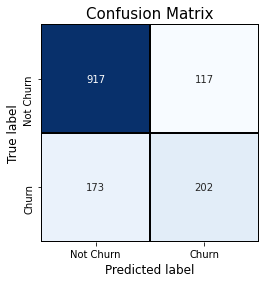


Classification Rpeort:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1034
           1       0.63      0.54      0.58       375

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

------------------------------------------------------

Area under curve: 0.8262914248871696


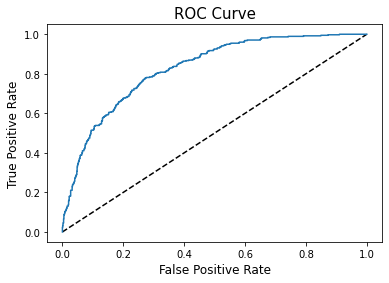

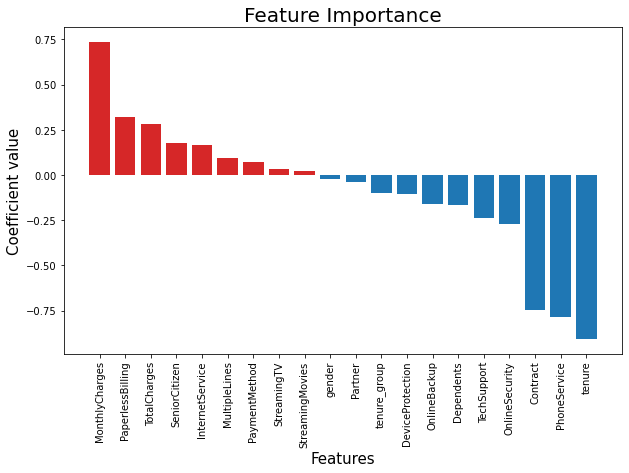

In [87]:
model_performance(LogisticRegression(C=0.1, random_state=20))
coef(LogisticRegression(C=0.1, random_state=20), 'coefficients')

- The negative coefficients indicate that customers with higher magnitude for negative coefficient tend to remain loyal and higher for positive coefficients tend to churn.

## 5.2.2 K-Nearest Neighbors

In [88]:
grid_search_cv(KNeighborsClassifier(), {'n_neighbors': np.arange(1, 50)})

Best parameter: {'n_neighbors': 38}
Best score: 0.793397200912034


Accuracy score: 0.7828246983676366

------------------------------------------------------


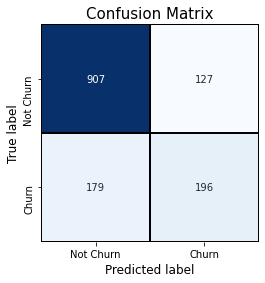


Classification Rpeort:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1034
           1       0.61      0.52      0.56       375

    accuracy                           0.78      1409
   macro avg       0.72      0.70      0.71      1409
weighted avg       0.77      0.78      0.78      1409

------------------------------------------------------

Area under curve: 0.8108549323017409


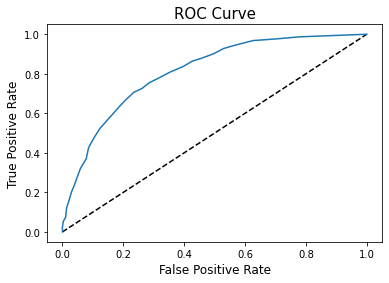

In [89]:
model_performance(KNeighborsClassifier(n_neighbors=38))

## 5.2.3 Support Vector Machine

In [90]:
randomized_search_cv(SVC(), {'C':np.arange(1,20), 
                             'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 
                             'gamma':['scale', 'auto']})

Best parameter: {'kernel': 'rbf', 'gamma': 'scale', 'C': 5}
Best score: 0.7994340727863649


Accuracy score: 0.7927608232789212

------------------------------------------------------


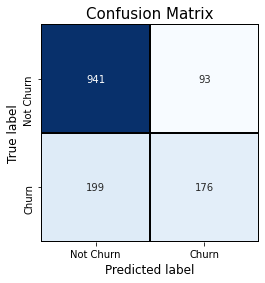


Classification Rpeort:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87      1034
           1       0.65      0.47      0.55       375

    accuracy                           0.79      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

------------------------------------------------------

Area under curve: 0.7818388136686008


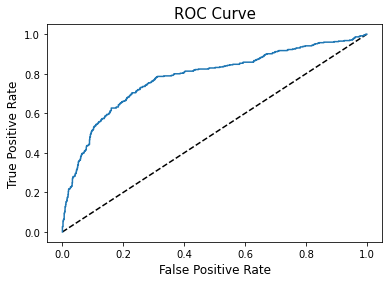

In [91]:
model_performance(SVC(C=1, kernel='rbf', gamma='scale', probability=True, random_state=20))

## 5.2.4 Decision Tree

In [92]:
randomized_search_cv(DecisionTreeClassifier(), {'max_depth':np.arange(2,7), 
                                                'max_features':np.arange(1,21), 
                                                'min_samples_leaf':np.arange(1,20), 
                                                'criterion':['gini', 'entropy']})

Best parameter: {'min_samples_leaf': 18, 'max_features': 17, 'max_depth': 4, 'criterion': 'gini'}
Best score: 0.790206026479221


Accuracy score: 0.7885024840312278

------------------------------------------------------


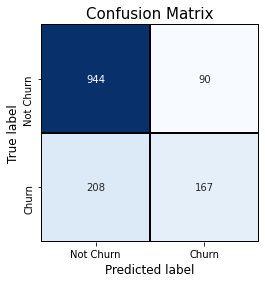


Classification Rpeort:
               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1034
           1       0.65      0.45      0.53       375

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.77      0.79      0.77      1409

------------------------------------------------------

Area under curve: 0.814749194068343


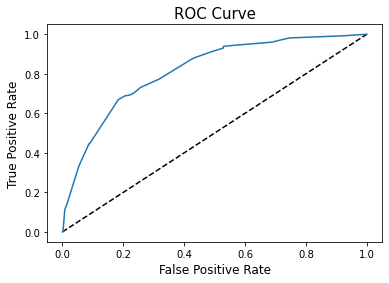

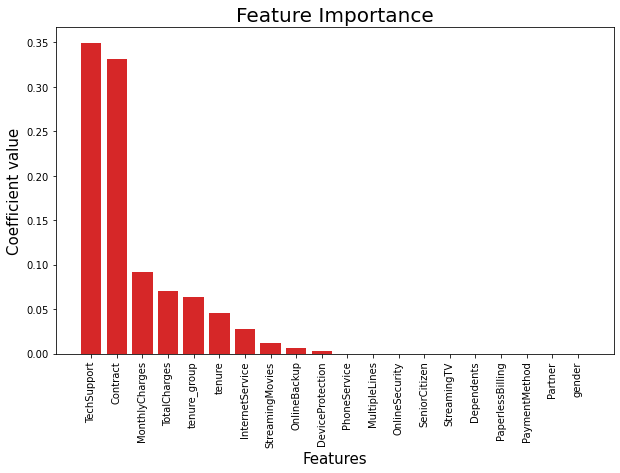

In [93]:
model_performance(DecisionTreeClassifier(min_samples_leaf=4, 
                                         max_features=13, 
                                         max_depth=5, 
                                         criterion='entropy', 
                                         random_state=10))
coef(DecisionTreeClassifier(min_samples_leaf=4, 
                                         max_features=13, 
                                         max_depth=5, 
                                         criterion='entropy', 
                                         random_state=10), 'features')

## 5.2.5 Random Forest

In [94]:
randomized_search_cv(RandomForestClassifier(), {'max_features': ['sqrt'],
                                                'max_depth': np.arange(2,7),
                                                'min_samples_leaf': np.arange(1,20)})

Best parameter: {'min_samples_leaf': 17, 'max_features': 'sqrt', 'max_depth': 5}
Best score: 0.7983677235680183


Accuracy score: 0.7963094393186657

------------------------------------------------------


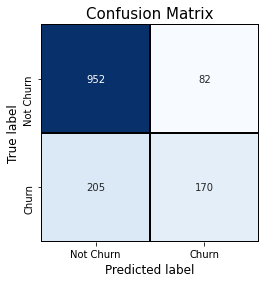


Classification Rpeort:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1034
           1       0.67      0.45      0.54       375

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

------------------------------------------------------

Area under curve: 0.8278143133462282


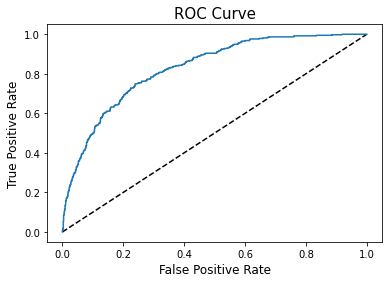

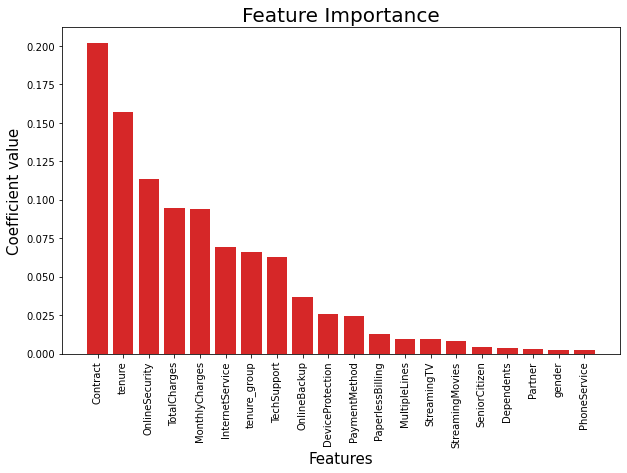

In [95]:
model_performance(RandomForestClassifier(min_samples_leaf=13, 
                                         max_features='sqrt', 
                                         max_depth=6, 
                                         random_state=50))
coef(RandomForestClassifier(min_samples_leaf=13, 
                                         max_features='sqrt', 
                                         max_depth=6, 
                                         random_state=50), 'features')

## 5.2.6 Gaussian Naive Bayes

Accuracy score: 0.7295954577714692

------------------------------------------------------


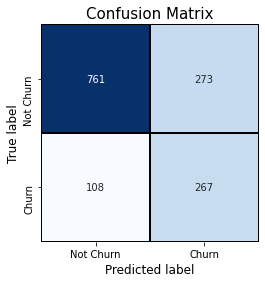


Classification Rpeort:
               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1034
           1       0.49      0.71      0.58       375

    accuracy                           0.73      1409
   macro avg       0.69      0.72      0.69      1409
weighted avg       0.77      0.73      0.74      1409

------------------------------------------------------

Area under curve: 0.8072946486137975


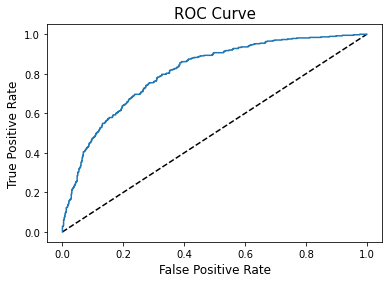

In [96]:
model_performance(GaussianNB())

**After tuning the parameters we saw some good improvements in the performance of the models.**
- **Decision Tree improved the most by an increase of 7.24% in accuracy.**
- **Logistic Regression, K-Nearest Neighbors and Random Forest improved their performances too.** 
- **Support Vector Machine and Gaussian Naive Bayes remained the same.**
- **The Gaussian Naive Bayes model is the lowest performing model with an accuracy of 73%.**

**All the models are performing equally (except the Gaussian Naive Bayes model) with an accuracy of 79% (approx).**

## 5.3 Voting Ensemble

**We now use the Voting Classifier to combine all the above mentioned machine learning classifiers. The models are pitted against each other and selected upon best performance by voting. Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.**

In [97]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(C=0.1, random_state=20)
clf2 = KNeighborsClassifier(n_neighbors=38)
clf3 = SVC(C=1, kernel='rbf', gamma='scale', probability=True, random_state=20)
clf4 = DecisionTreeClassifier(min_samples_leaf=4, max_features=13, max_depth=5, criterion='entropy', random_state=10)
clf5 = RandomForestClassifier(min_samples_leaf=13, max_features='sqrt', max_depth=6, random_state=50)
clf6 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('knn', clf2), ('svm', clf3), ('dt', clf4), ('rf', clf5), ('gnb', clf6)], 
                        voting='hard')
eclf.fit(X_train, y_train)
predictions = eclf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7934705464868701


In [98]:
from sklearn.model_selection import cross_val_score

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, clf6, eclf], 
                       ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine', 
                        'Decision Tree', 'Random Forest', 'Naive Bayes', 'Ensemble']): 
    scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.80 (+/- 0.01) [Logistic Regression]
Accuracy: 0.79 (+/- 0.01) [K-Nearest Neighbors]
Accuracy: 0.80 (+/- 0.01) [Support Vector Machine]
Accuracy: 0.79 (+/- 0.01) [Decision Tree]
Accuracy: 0.80 (+/- 0.01) [Random Forest]
Accuracy: 0.75 (+/- 0.01) [Naive Bayes]
Accuracy: 0.80 (+/- 0.01) [Ensemble]


**The voting ensemble gives an accuracy score of 80%.**

# 6. CONCLUSION

## 6.1 Recommendations to retain the customers:

**Take the following actions immediately:**
- **Try striking a longer contract with new customers: two year or more.**


- **Lower the monthly charges.**


- **Leverage the time to improve the quality of services, on the high cost ones like fiber optic.**


- **Improve on the Technical support on all services like streaming, phone connection and internet. Be up-to-date with current technology.**


- **Collect customer feedback and act on it immediately to prevent new customer churn.**

**Next: It will be helpful to get more features to understand the behaviour of the customers according to location and different service providers.**

## 6.2 Scope for future work:

- **More predictive models could be tried. However, there is no guarantee of better accuracy, as we have seen similar accuracy with logistic regression, decision tree and random forest. This actually means most of the variance in the data is explained.**


- **One could collect more data through surveys, analyze them using NLP techniques and take more measures.**


- **There is a scope to collect historical data on company customers over a few decades, and fight out clear reason for customer drop.**